# Evaluating $\frac{\mathrm{d}^nI}{\mathrm{d}\beta^n}\Big|_{\beta=0}$

In [2]:
import numpy as np
import sympy
from sympy import *
print("Using sympy version", sympy.__version__)
init_session(quiet=True)
I, I0, lam, lam0, beta, x = symbols(r'I I_0 \lambda \lambda_0 \beta x')

Using sympy version 1.3



The intensity observed at a particular wavelength $\lambda$ given a Doppler parameter $\beta$ is simply

$$
\begin{align}
    I(\lambda) = I_0(\lambda_0)
\end{align}
$$

In other words, the intensity observed at the shifted wavelength $\lambda$ is just the intensity originally emitted at the *unshifted* wavelength $\lambda_0$. The non-relativistic Doppler shift is given by

$$
\begin{align}
    \frac{\lambda - \lambda_0}{\lambda_0} = \beta
\end{align}
$$

or, solving, for $\lambda_0$,

$$
\begin{align}
    \lambda_0 = \frac{\lambda}{1 + \beta}
\end{align}
$$

Our task is to differentiate the spectrum with respect to $\beta$; specifically, we want the general expression for the $n^\mathrm{th}$ derivative evaluated at $\beta = 0$ so that we can Taylor expand $I$:

$$
\begin{align}
    \frac{\mathrm{d}^nI}{\mathrm{d}\beta^n} = \frac{\mathrm{d}^n}{\mathrm{d}\beta^n}\Big( I_0 \big(\lambda_0(\beta)\big) \Big)
\end{align}
$$

We can use the chain rule to take the first couple derivatives by hand, but to obtain the general expression, we will use [Faa di Bruno's formula](https://en.wikipedia.org/wiki/Fa%C3%A0_di_Bruno%27s_formula):

$$
\begin{align}
    \frac{\mathrm{d}^n}{\mathrm{d}x^n} f(g(x)) = \sum_{k=1}^n \frac{\mathrm{d}^k}{\mathrm{d}g(x)^k}f(g(x))\cdot B_{n,k}\left(g'(x),g''(x),\dots,g^{(n-k+1)}(x)\right)
\end{align}
$$

where $B_{n,k}$ are the [incomplete Bell polynomials](https://en.wikipedia.org/wiki/Bell_polynomial).

In our case, $f = I_0$, $g = \lambda_0$, and $x = \beta$. The derivatives $g^{(j)}(x) = \frac{\mathrm{d}^j \lambda_0}{\mathrm{d}\beta^j}$ are easily obtained by repeatedly differentiating the expression for $\lambda_0$ above:

$$
\begin{align}
    \frac{\mathrm{d} \lambda_0}{\mathrm{d}\beta} &= -\lambda(1 + \beta)^{-2} \\
    \frac{\mathrm{d}^2 \lambda_0}{\mathrm{d}\beta^2} &= 2\lambda(1 + \beta)^{-3} \\
    \frac{\mathrm{d}^3 \lambda_0}{\mathrm{d}\beta^3} &= -6\lambda(1 + \beta)^{-4}
\end{align}
$$
The general case is
$$
\begin{align}
    \frac{\mathrm{d}^j \lambda_0}{\mathrm{d}\beta^j} &= (-1)^j j! \lambda(1 + \beta)^{-j - 1}
\end{align}
$$
Evaluating at $\beta = 0$, we have
$$
\begin{align}
    \frac{\mathrm{d}^j \lambda_0}{\mathrm{d}\beta^j}\Big|_{\beta=0} &= (-1)^j j! \lambda
\end{align}
$$

The Bell polynomial term $B_{n,k}\left(...\right)$ in Faa di Bruno's formula thus becomes
$$
\begin{align}
B_{n, k}\Bigg( \Big\{(-1)^j j! \lambda\Big\}_{j=1}^{n - k + 1} \Bigg) \\
&= \lambda^k B_{n, k}\Bigg( \Big\{(-1)^j j! \Big\}_{j=1}^{n - k + 1} \Bigg) \\
&\equiv \lambda^k P_{n,k}
\end{align}
$$

where $P_{n, k}$ may be computed as

In [8]:
def P(n, k):
    """
    Return the incomplete Bell polynomial needed to compute
    D/Dbeta.
    
    """
    if k > n:
        return 0
    series = [(-1) ** j * factorial(j) for j in range(1, n - k + 2)]
    return bell(n, k, series)

# Print the first several Pnks
Matrix([[P(n, k) for k in range(1, 10)] for n in range(1, 10)]) 

⎡  -1        0         0         0        0       0       0     0   0 ⎤
⎢                                                                     ⎥
⎢   2        1         0         0        0       0       0     0   0 ⎥
⎢                                                                     ⎥
⎢  -6        -6        -1        0        0       0       0     0   0 ⎥
⎢                                                                     ⎥
⎢  24        36        12        1        0       0       0     0   0 ⎥
⎢                                                                     ⎥
⎢ -120      -240      -120      -20      -1       0       0     0   0 ⎥
⎢                                                                     ⎥
⎢  720      1800      1200      300      30       1       0     0   0 ⎥
⎢                                                                     ⎥
⎢ -5040    -15120    -12600    -4200    -630     -42     -1     0   0 ⎥
⎢                                                               

The other term in Faa di Bruno's formula, $\frac{\mathrm{d}^k}{\mathrm{d}g(x)^k}f(g(x))$, is the $k^\mathrm{th}$ derivative of the spectrum $I_0$ with respect to the rest frame wavelength $\lambda_0$, evaluated at $\lambda_0 = \lambda$. In an inference problem, these terms will have to either be learned from the data or computed using finite differences from the spectrum.

Summarizing everything, we compute the required derivatives with respect to $\beta$ as

$$
\begin{align}
    \frac{\mathrm{d}^n}{\mathrm{d}\beta^n} I_0(\lambda_0)\Big|_{\beta=0} &= \sum_{k=1}^n \frac{\mathrm{d}^k I_0(\lambda_0)}{\mathrm{d}\lambda_0^k}\Big|_{\lambda_0=\lambda} \lambda^k P_{nk}
\end{align}
$$

where
$$
P_{nk} \equiv B_{n, k}\Bigg( \Big\{(-1)^j j! \Big\}_{j=1}^{n - k + 1} \Bigg)
$$

and $B_{n, k}$ is the incomplete Bell polynomial. Note that the $P_{nk}$ are just integers that can easily be precomputed, as shown above.

In [4]:
def DDbeta(I, lam, n):
    """
    Return the n^th derivative of I(lam) with respect to beta.
    
    """
    res = 0
    for k in range(1, n + 1):
        res += Derivative(I, lam, k) * lam ** k * P(n, k)
    return res

## The first few $\beta$ derivatives

Let's compute the first few derivatives as an example.

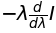

In [5]:
DDbeta(I, lam, 1)

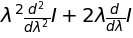

In [6]:
DDbeta(I, lam, 2)

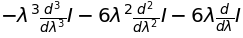

In [7]:
DDbeta(I, lam, 3)

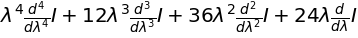

In [8]:
DDbeta(I, lam, 4)

## Proof by direct differentiation

We can use ``sympy`` to analytically differentiate a mock spectrum (given below by the equation $I(\lambda_0) = \sin(\lambda_0)$ as a silly example) and compare to the expressions above up to the fifth order derivatives:

In [21]:
# The wavelength at which the light was *emitted*
lam0 = lam / (1 + beta)

# A test spectrum
I = sin(lam0)

# Check the derivatives up to n=5
for n in range(1, 6):
    # Compute the derivative directly and evaluate it at beta = 0
    expr1 = diff(I, beta, n).subs(beta, 0).expand()
    
    # Compute the derivative using Faa di Bruno's formula
    expr2 = DDbeta(I, lam, n).doit().subs(beta, 0).expand()
    
    # Throw an AssertionError if they disagree
    assert expr1 == expr2

The expressions agree.